## Asymmetric double well

So far we have been looking at quite simple systems (quantum harmonic oscillator or a gaussian well).

Now we are going to look at a slightly more complicated (and interesting!) case, which will highlight features of DFT, TDDFT and the iDEA code.

Hopefully this solution is detailed enough, but if you have any comments, corrections or additions please email them to either robert.oliver@ccc.ox.ac.uk or rex.godby@york.ac.uk

In [1]:
# Import iDEA and parameters
import iDEA
from iDEA.input import Input
pm = Input.from_python_file("parameters.py")
pm.check()

At this point, everything is in its default state. The potential we're going to be using is wider than the default in iDEA, so we need to extend the system to cover a sufficent range ($x_{max} = 20$ a.u. is sensible), and also increasing the grid points to 301 to ensure convergence.
We're at the non-interacting electron, LDA and exact solutions, for both the ground state and time depependant cases so we better switch these on. 

We need to increase the max time it runs for to be able to see the effect of the applied potential (which is switched on at $t=0$). We choose ($t=20$ a.u.) which then means we need to increase the max number of iteration steps (to $i_{max} = 20 001$) so keep the time step small, giving convergence. 

We also turn on the exact reverse engineering as this highlights another important feature of the the iDEA code. (This is a little tricker to find, as it is hidden in the "ext" part of the parameters file).

In [2]:
# Adjust the parameters to answer the exercise
# NB - if your system has trouble running iDEA from the notebook, try setting pm.run.verbosity to 'low'
pm.run.name = "double_antisym_well_run7"
pm.run.HF = False
pm.run.LDA = True
pm.run.EXT = True
pm.run.verbosity = 'low'
pm.run.time_dependence = True
pm.ext.RE = True                           #RE for reverse engineering
pm.sys.xmax = 20.0
pm.sys.tmax = 20.0
pm.sys.imax = 20001
pm.sys.grid = 301



To change the potential, we need to define out own potential function in ipython, and then set it to $v_{ext}$. The form of the potential is a little unwieldy - you don't need to know where it comes from for the time being.

In [3]:
# Change the external potential to that given above

import numpy as np
def double_antisym_pot(x):
    return -(6.0/5.0) * np.exp(-(1.0/125.0)*(x-10)**4)-(9.0/10.0)*math.e**(-(1.0/10.0)*(x+10)**2)

def v_pert(x):
    return -0.1*x

pm.sys.v_ext = double_antisym_pot
pm.sys.v_pert = v_pert

Let's check that this has given us what we expected:

In [34]:
# Optional (but recommended) - check that parameters file has updated as you expected

print("The run parameters are:", pm.run)
print("The system paramaters are:", pm.sys)
print("Is reverse engineering on:", pm.ext.RE)

The run parameters are: name = 'double_antisym_well_run7'
time_dependence = True
verbosity = 'low'
save = True
module = 'iDEA'
NON = True
LDA = True
MLP = False
HF = False
EXT = True
MBPT = False
HYB = False
LAN = False

The system paramaters are: NE = 2
grid = 301
stencil = 3
xmax = 20.0
tmax = 20.0
imax = 20001
acon = 1.0
interaction_strength = 1.0
im = 0
v_ext = <function double_antisym_pot at 0x7f651e4a0d08>
v_pert = <function v_pert at 0x7f651e4a0950>
v_pert_im = <function v_pert_im at 0x7f651f9ff1e0>

Is reverse engineering on: True


### Running iDEA
Now we're ready to run the code, in exactly the same way as in the iDEA notebook. (Expect this to take a while as the time dependence is quite computationally intensive). 

In [35]:
# Hopefully everything is good to go now, so go ahead and run iDEA

results = pm.execute()

### Plotting electron densities
Let's have a look at some of the graphs we've produced. Again, we plot the results in axactly the same way as before. First of all, we look at how the ground state exact, LDA and non-interacting electron densities compare - hopefully your graphs look something like this!

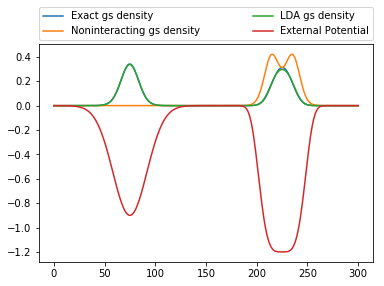

In [48]:
# Import matplotlib and plot each of the densities you've calculated thus far

import matplotlib.pyplot as plt

plt.plot(results.ext.gs_ext_den, label = "Exact gs density")
plt.plot(results.non.gs_non_den, label = "Noninteracting gs density")
plt.plot(results.lda.gs_lda2_den, label = "LDA gs density")
plt.plot(results.ext.gs_ext_vxt, label = "External Potential")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

This plot highlights a couple interesting things. Firstly, we see that the "complete neglect" approximation of non-interacting electrons does a terrible job of describing the system. The RHS well is deeper, so in the absense of the Coulomb force between the two electrons, they both sit in this well. 

Secondly, we see that the LDA does a pretty good job for this system.

**RETURN TO THIS**

### Plotting the potentials
It is illustrative to compare the KS effective potential against the external potential to see what about DFT makes it work so well. 

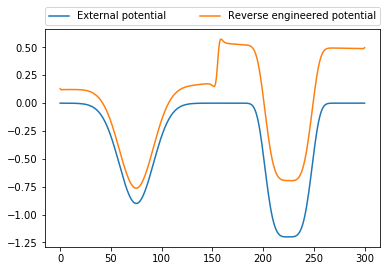

In [37]:
# Plot the KS potential and the external potential on the same graph

plt.plot(results.ext.gs_ext_vxt, label = "External potential")
plt.plot(results.extre.gs_extre_vks, label = "Reverse engineered potential")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

As you can see, two potentials look similar but with one important difference. (The shift of the effective potential in energy is arbitary, as one is free to choose the zero of energy.) 

The RHS well has been shifted up, relative to the LHS well in the effective potential. This has been done since in the fictitious KS system, the electrons are non-interacting, so to ensure that there is no preference for which well the electron would like to be in, the ground state energies of the KS potential wells must now be equal. You can see that this shift worked if you look at the plot of the electron densities. (i.e. without this step in the potential, the non-interacting electrons both sat in the RHS well, but looking at the LDA plot, we can see that it does get one electron in each well).

If you're interested to know more about step and discontinuities in KS potentials, you might like to read "Origin of static and dynamic steps in exact Kohn-Sham potentials", M.J.P. Hodgson, J.D. Ramsden and R.W. Godby, Physical Review B 93 155146 (2016)

ASIDE - it is interesting to compare the exact and LDA wavefunctions. In the exact case, the postions of the electrons are strongly entangled - if an electron is in the LHS well, the other will be found in the RHS well and vice versa. However, the LDA wavefunctions predict that each electron has a 50% chance of being found in either well. This difference doesn't show up in the density (to the accruacy of the approximation), however, so that means that the physics (eg ionisastion energy) of each system is the same!

### Time dependence - animations

As I'm sure you're aware running the time dependent part of the code for long times takes a long time! But we hope you agree that it was worth it because not only does it yield some very interesting physics, but you get to see some really cool animations! Firstly, we need to install all of the relevant packages to get this up and running, as per the Getting Started notebook.

In [38]:
# Import the relevant packages for animations

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
from iDEA.input import Input

Now we need to import the file we want to look at. To do this we import the Results class from iDEA and results, and then read the file we're interested in, storing the results in an array. You might not have had to do this step for your solution, but including this here means that you don't have to run iDEA again to see the solutions which saves a lot of time!

In [39]:
#this first part shouldn't be necessary for you
from iDEA.results import Results as rs
file_name = 'td_ext_den'                  #Change this to the ".db" file name you want to see, not including the .db part



array = rs.read(file_name, pm)     #this ought to read:   array = results.ext.td_ext_den 

print(np.shape(array))

(20001, 301)


Each row in this array stores the data for one time step, and each column the information about a grid point. (i.e. location (3756, 274) holds the information of grid point 274 at time step 3756.)

Now we need to set up the background onto which we plot our animation. We set our $x$-axis to cover the range of the grid, and our $y$-axis to a height where we can see the density moving clearly.

In [40]:
# Set the background for the animation
fig, ax = plt.subplots()

ax.set_xlim((0, pm.sys.grid))
ax.set_ylim((0, 0.6))
plt.title(file_name)

line, = ax.plot([], [], lw=2)

In [41]:
# Define the init function
def init():
    line.set_data([], [])
    return (line,)

In [42]:
# Define the animation function
def animate(i):
    x = np.arange(0,pm.sys.grid)
    y = array[10*i,x]            # this skips every 10 frames to speed up the animation
    line.set_data(x, y)
    return (line,)

In [43]:
# Display the animation
rc('animation', html='html5')
animation.FuncAnimation(fig, animate, init_func=init,save_count = int(pm.sys.imax*0.1), # the *0.1 accounts for the frame skipping above
                               interval=10, blit=True)

We can see that this is a tunnelling system because the density doesn't grow very much in the central region, which is what we'd expect for a ballastic system. This animation shows some interesting things about the system. Firstly, as the perturbation is applied, we can see the left electron being 'poured' into the RHS well. Then when there isa significant probability of finding the electron in this well, the Coulomb repulsion is strong enough to cause the left electron to bounce back, which is why we see the density grow in the opposite direction to the perturbation at large times. 